In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline


In [23]:
df=pd.read_csv("D:/dataset/stock price predictionn.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


# performing some explonatory data analysis

In [24]:
df.shape

(1009, 7)

In [25]:
df.describe(include = 'all')

,Date,Open,High,Low,Close,Adj Close,Volume
count,1009,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
unique,1009,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-02-05,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,NaN,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,NaN,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,NaN,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,NaN,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,NaN,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [27]:
df.count()

Date         1009
Open         1009
High         1009
Low          1009
Close        1009
Adj Close    1009
Volume       1009
dtype: int64

In [28]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [29]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [30]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


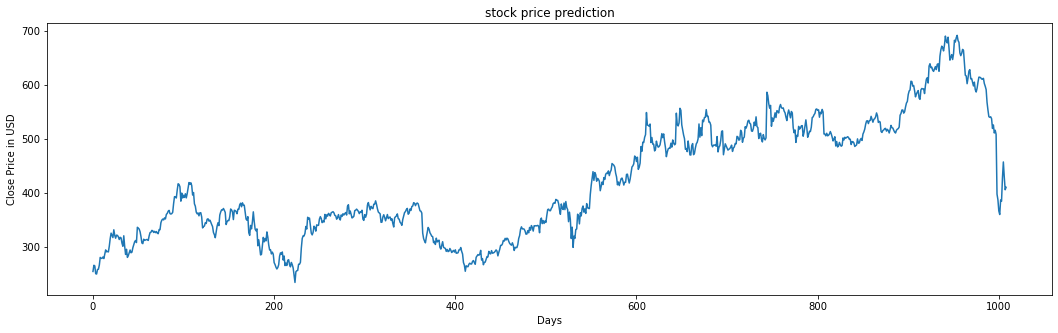

In [31]:
#Viulasie the close price
plt.figure(figsize=(18,5)) 
plt.title("stock price prediction")
plt.xlabel('Days')
plt.ylabel('Close Price in USD')
plt.plot(df['Close'])
plt.show()


In [32]:
df = df[['Close']]
df.head(4)

,Close
0,254.259995
1,265.720001
2,264.559998
3,250.100006


In [33]:
#Craeting  a variable to predict the 'X' days out into future
future_days = 25
#Create a new Column (target) shifted 'X units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.head(4)

,Close,Prediction
0,254.259995,315.880005
1,265.720001,321.549988
2,264.559998,321.089996
3,250.100006,318.450012


In [34]:
#Craete the feature dataset (x) and convert it to numpy  array
x = np.array(df.drop(['Prediction'],1))[:-future_days]
print(x)

[[254.259995]
 [265.720001]
 [264.559998]
 [250.100006]
 [249.470001]
 [257.950012]
 [258.269989]
 [266.      ]
 [280.269989]
 [278.519989]
 [278.549988]
 [281.040009]
 [278.140015]
 [285.929993]
 [294.160004]
 [290.609985]
 [291.380005]
 [290.390015]
 [301.049988]
 [315.      ]
 [325.220001]
 [321.160004]
 [317.      ]
 [331.440002]
 [321.299988]
 [315.880005]
 [321.549988]
 [321.089996]
 [318.450012]
 [313.480011]
 [317.5     ]
 [316.480011]
 [306.700012]
 [300.940002]
 [320.350006]
 [300.690002]
 [285.769989]
 [295.350006]
 [280.290009]
 [283.670013]
 [288.940002]
 [293.970001]
 [288.850006]
 [289.929993]
 [298.070007]
 [303.670013]
 [309.25    ]
 [311.649994]
 [307.779999]
 [336.059998]
 [334.519989]
 [332.700012]
 [327.769989]
 [318.690002]
 [307.019989]
 [305.76001 ]
 [313.980011]
 [311.76001 ]
 [312.459991]
 [313.299988]
 [313.359985]
 [311.690002]
 [320.089996]
 [326.26001 ]
 [326.890015]
 [330.299988]
 [329.600006]
 [326.459991]
 [328.529999]
 [326.130005]
 [328.190002]
 [325.

C:\Users\bliss\AppData\Local\Temp\ipykernel_20708\759943248.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(df.drop(['Prediction'],1))[:-future_days]


In [35]:
#Craete the target Data Set (y) and convert into numpy array and get all target values except last 'X' rows/days

y = np.array(df['Prediction'])[:-future_days]
print(y)

[315.880005 321.549988 321.089996 318.450012 313.480011 317.5
 316.480011 306.700012 300.940002 320.350006 300.690002 285.769989
 295.350006 280.290009 283.670013 288.940002 293.970001 288.850006
 289.929993 298.070007 303.670013 309.25     311.649994 307.779999
 336.059998 334.519989 332.700012 327.769989 318.690002 307.019989
 305.76001  313.980011 311.76001  312.459991 313.299988 313.359985
 311.690002 320.089996 326.26001  326.890015 330.299988 329.600006
 326.459991 328.529999 326.130005 328.190002 325.220001 324.179993
 331.820007 331.619995 344.720001 349.290009 351.290009 349.730011
 353.540009 351.600006 359.929993 361.809998 365.799988 367.450012
 361.399994 360.570007 361.450012 363.829987 379.929993 392.869995
 391.980011 390.399994 404.980011 416.76001  415.440002 411.089996
 384.480011 399.390015 390.390015 395.420013 391.429993 398.179993
 390.519989 398.390015 408.25     418.970001 415.630005 418.649994
 413.5      395.799988 400.480011 379.480011 375.130005 364.230011


In [40]:
#Splits the data into 75% training and  75% testing
x_train,x_test,y_train ,y_test = train_test_split(x,y,test_size = 0.25)

In [41]:
#Create a models
#Create a descison tree regressor model
tree = DecisionTreeRegressor().fit(x_train,y_train)
#Create a Linear Regression mmodel
lr = LinearRegression().fit(x_train,y_train)

In [42]:
#Get the last rows of feature data set
x_future = df.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

C:\Users\bliss\AppData\Local\Temp\ipykernel_20708\2876460345.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = df.drop(['Prediction'],1)[:-future_days]


array([[658.289978],
       [665.640015],
       [663.840027],
       [641.900024],
       [617.77002 ],
       [616.469971],
       [602.130005],
       [612.690002],
       [625.580017],
       [628.080017],
       [611.      ],
       [611.659973],
       [604.559998],
       [597.98999 ],
       [605.039978],
       [591.059998],
       [586.72998 ],
       [593.73999 ],
       [604.919983],
       [614.23999 ],
       [614.090027],
       [613.119995],
       [610.710022],
       [610.539978],
       [612.090027]])

In [43]:
#Show the model tree Prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#Show the model linear regrssion prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[602.440002 597.369995 591.150024 646.909973 553.289978 541.059998
 539.849976 540.840027 537.219971 519.200012 525.690002 510.799988
 515.859985 508.25     397.5      387.149994 653.159973 674.049988
 397.5      384.359985 427.140015 645.719971 429.480011 405.600006
 410.170013]

[638.64249626 645.21066358 643.60215163 623.99604478 602.43290111
 601.27114651 588.45661291 597.89327659 609.4120996  611.64615887
 596.38305074 596.97281825 590.62811226 584.75699735 591.05703377
 578.5641922  574.69478545 580.95909659 590.94980339 599.27838261
 599.14437212 598.27752853 596.12391952 595.97196417 597.35712471]


C:\Users\bliss\AppData\Local\Temp\ipykernel_20708\2347701048.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = Prediction


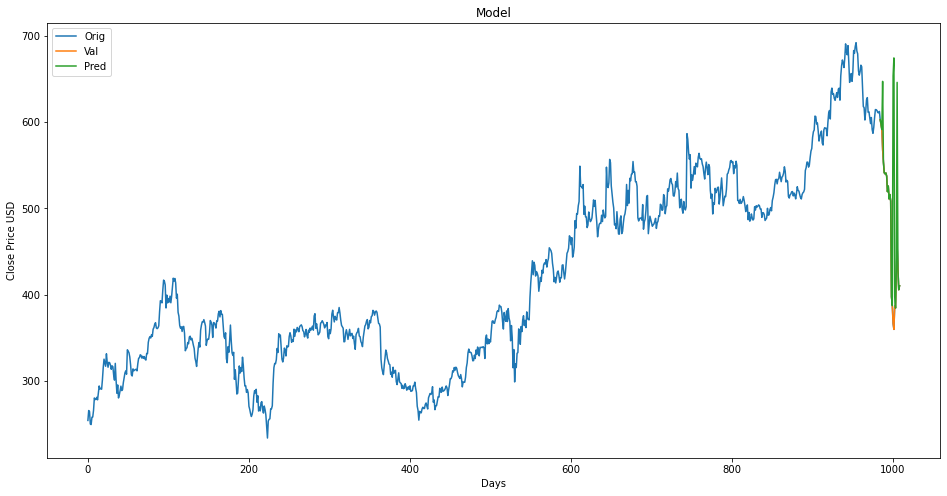

In [44]:
#Visualize the data
Prediction = tree_prediction

valid = df[x.shape[0]:]
valid['Prediction'] = Prediction

plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Days")
plt.ylabel("Close Price USD")
plt.plot(df['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Orig','Val','Pred'])


C:\Users\bliss\AppData\Local\Temp\ipykernel_20708\145365143.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = Prediction


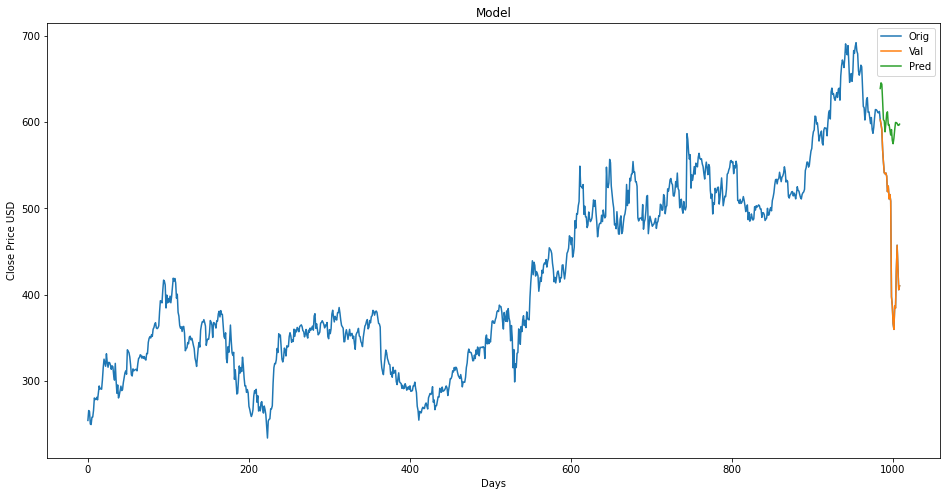

In [45]:
#Visualize the data
Prediction = lr_prediction

valid = df[x.shape[0]:]
valid['Prediction'] = Prediction

plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Days")
plt.ylabel("Close Price USD")
plt.plot(df['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Orig','Val','Pred'])